### Positional embeddings  
Since self-attebtion mechanism does not have any information about the position of the tokens, we need to add positional embeddings to the input embeddings. There are two ways of adding positional embeddings:  
1. use trainable parameters to learn the positional embeddings
2. use fixed positional embeddings. (ex. RoPE)  
Here, we will explore GPT2's positional embeddings.

In [6]:
from transformers import AutoModelForCausalLM
model_hf = AutoModelForCausalLM.from_pretrained("openai-community/gpt2")
sd_hf = model_hf.state_dict()
for k in sd_hf:
    if k.startswith("transformer.wpe"):
        print(k, sd_hf[k].shape)

transformer.wpe.weight torch.Size([1024, 768])


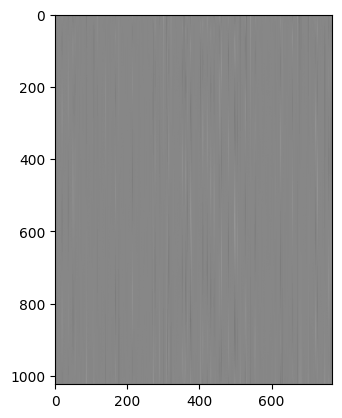

In [7]:
import matplotlib.pyplot as plt

plt.imshow(sd_hf["transformer.wpe.weight"],cmap='gray')

showing the individual columns of the positional embeddings of GPT2. 

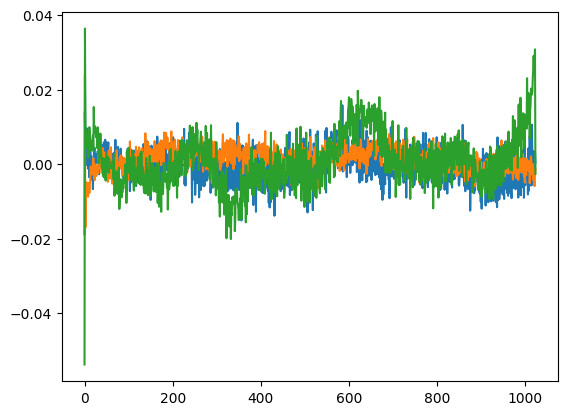

In [8]:
plt.plot(sd_hf["transformer.wpe.weight"][:,0].numpy())
plt.plot(sd_hf["transformer.wpe.weight"][:,100].numpy())
plt.plot(sd_hf["transformer.wpe.weight"][:,200].numpy())

We can see that postional embeddings are like sine and cosine functions with different frequencies.